In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [94]:
import qalsadi.lemmatizer as qlm
import arabic_reshaper
from bidi.algorithm import get_display

In [54]:
lem=qlm.Lemmatizer()

In [55]:
#Djenne scholars dataframe
ch_6_scholars=pd.read_csv('tarikh_as_sudan_ch_6_scholar_descriptions.csv', header=None, engine='python',skipfooter=12)
ch_6_scholars.insert(0,'chapter',6)
ch_6_scholars['descriptors'] = [[word for word in scholar if word==word] for scholar in ch_6_scholars.iloc[:,2:].values.tolist()]
ch_6_scholars.reset_index(inplace=True)
ch_6_scholars.drop(ch_6_scholars.columns[3:13],axis=1,inplace=True)
ch_6_scholars.rename(columns={0:'scholar'},inplace=True)
ch_6_scholars.drop(ch_6_scholars.columns[0],axis=1,inplace=True)
ch_6_scholars

,chapter,scholar,descriptors
0,6,Murimagha-Kankoi,"[فقيهاً, عالماً, صالحاً, عابداً, جليل, القدر]"
1,6,Mohammed-Foudiki-Sanou-El-Ouankori,"[فودى, الفقيه, فقيهاً, عالماً, عابداً, صالحاً,..."
2,6,Mohammed-ben-Omar-ben-Mohammed-Aqit,"[ولّى الله, الفقيه, سيّدى, قضاء, قاض, الخطيب]"
3,6,El- ' Abbas-Kibi,"[القاضى, فقيهاً, عالماً, جليلاً, فاضلاً, خيراً..."
4,6,Mahmoud-ben-Abou-Bekr-Baghyo ' o,"[القاضى, فقيهاً, عالماً, جليلاً, القضاء]"
5,6,Mohammed-Baghyo ' o,"[العالمين, الفاضلين, الفقيه]"
6,6,Ahmed-Baghyo ' o,"[العالمين, الفاضلين, الفقيه]"
7,6,Ahmed-Torfo,"[القاضى, خطيباً, امام, قاضياً]"
8,6,Omar-Torfo ',[القاضى]
9,6,Mama,"[الخطيب, الخطيبية]"


In [56]:
#Timbuktu scholars dataframe

#ch. 9
ch_9_scholars=pd.read_csv('tarikh_as_sudan_ch_9_scholar_descriptions.csv', header=None)
ch_9_scholars.insert(0,'chapter',9)

In [57]:
#ch. 10
ch_10_scholars=pd.read_csv('tarikh_as_sudan_ch_10_scholar_descriptions.csv', header=None)
ch_10_scholars.insert(0,'chapter',10)

In [58]:
#combined 9 & 10
timbuktu_scholars=pd.concat([ch_9_scholars,ch_10_scholars])
timbuktu_scholars['descriptors'] = [[word for word in scholar if word==word] for scholar in timbuktu_scholars.iloc[:,2:].values.tolist()]
timbuktu_scholars.reset_index(inplace=True)
timbuktu_scholars.drop(timbuktu_scholars.columns[3:72],axis=1,inplace=True)
timbuktu_scholars.rename(columns={0:'scholar'},inplace=True)
timbuktu_scholars.drop(timbuktu_scholars.columns[0],axis=1,inplace=True)
timbuktu_scholars

,chapter,scholar,descriptors
0,9,Mohammed El-Kabari,"[الشيخ, العالم, الفاضل, الصالح, الولي, ذى, الك..."
1,9,El-Hâdj,"[الفقيه, القاضى, السيد, المبارك]"
2,9,Abderrahman-ben-Abou-Bekr-ben-El-Hâdj,[القاضى]
3,9,Ibrahim (1),"[السيد, الفقيه]"
4,9,El-Amin-ben-Ahm,"[شيخ, الفاضل, الزاهد, الفقيه]"
...,...,...,...
161,10,'Abderrahman-ben-Ahmed,[الفقيه]
162,10,'Omar-ben-Mohammed-ben-'Omar,[الفقيه]
163,10,Ahmed-Moghya,[الفقيه]
164,10,Ahmed (4),"[والفقيه, القاضى, سيدي, والسيدي, سيّدي]"


In [59]:
#lemmatizing function for dataframes
def lemma_list(row):
    lemmas=list()
    description = row['descriptors']
    for word in description:
        lemmas.append(lem.lemmatize(word))
    
    return lemmas

In [74]:
#dataframe of all the scholars
all_scholars=pd.concat([ch_6_scholars,timbuktu_scholars])
all_scholars ['lemmas'] = all_scholars.apply(lambda row: lemma_list(row), axis=1)
all_scholars.reset_index(inplace=True)
all_scholars.drop(all_scholars.columns[0],axis=1,inplace=True)
all_scholars.reset_index(inplace=True)
all_scholars=all_scholars.rename(columns = {'index':'ID'})
all_scholars

,ID,chapter,scholar,descriptors,lemmas
0,0,6,Murimagha-Kankoi,"[فقيهاً, عالماً, صالحاً, عابداً, جليل, القدر]","[فقيه, عالم, صالح, عابد, جليل, قدر]"
1,1,6,Mohammed-Foudiki-Sanou-El-Ouankori,"[فودى, الفقيه, فقيهاً, عالماً, عابداً, صالحاً,...","[ودى, فقيه, فقيه, عالم, عابد, صالح, ولي, شيخ, ..."
2,2,6,Mohammed-ben-Omar-ben-Mohammed-Aqit,"[ولّى الله, الفقيه, سيّدى, قضاء, قاض, الخطيب]","[ولى, فقيه, سيدى, قضاء, قاضي, خطيب]"
3,3,6,El- ' Abbas-Kibi,"[القاضى, فقيهاً, عالماً, جليلاً, فاضلاً, خيراً...","[قاضى, فقيه, عالم, جليل, فاضل, خير, سخي]"
4,4,6,Mahmoud-ben-Abou-Bekr-Baghyo ' o,"[القاضى, فقيهاً, عالماً, جليلاً, القضاء]","[قاضى, فقيه, عالم, جليل, قضاء]"
...,...,...,...,...,...
174,174,10,'Abderrahman-ben-Ahmed,[الفقيه],[فقيه]
175,175,10,'Omar-ben-Mohammed-ben-'Omar,[الفقيه],[فقيه]
176,176,10,Ahmed-Moghya,[الفقيه],[فقيه]
177,177,10,Ahmed (4),"[والفقيه, القاضى, سيدي, والسيدي, سيّدي]","[فقيه, قاضى, سيد, سيد, سيد]"


In [187]:
#save scholar dataframe as csv
all_scholars.to_csv('TS_Scholar_Descriptions.csv',sep='\t', encoding='utf-8')

In [122]:
#create bipartite graph
title_graph=nx.Graph()

In [123]:
for scholar in all_scholars.iterrows():
    title_graph.add_node(scholar[1][0], uses=1, typ='scholar')
    for lemma in scholar[1][4]:
        reshaped_lemma = arabic_reshaper.reshape(lemma)
        arlemma = get_display(reshaped_lemma)
        if title_graph.has_node(arlemma):
            title_graph.node[arlemma]['uses']+=1
        else:
            title_graph.add_node(arlemma, uses=1, typ='title')
            
        if title_graph.has_edge(scholar[1][0],arlemma):
            title_graph[scholar[1][0]][arlemma]['mentions']+=1
        else:
            title_graph.add_edge(scholar[1][0],arlemma, mentions=1)
    

In [124]:
#plot graph
node_sizes=nx.get_node_attributes(title_graph,'uses')
sizes=list()
for node in node_sizes:
    sizes.append(1000*node_sizes.get(node))

In [125]:
scholars=list(all_scholars[all_scholars.columns[0]])

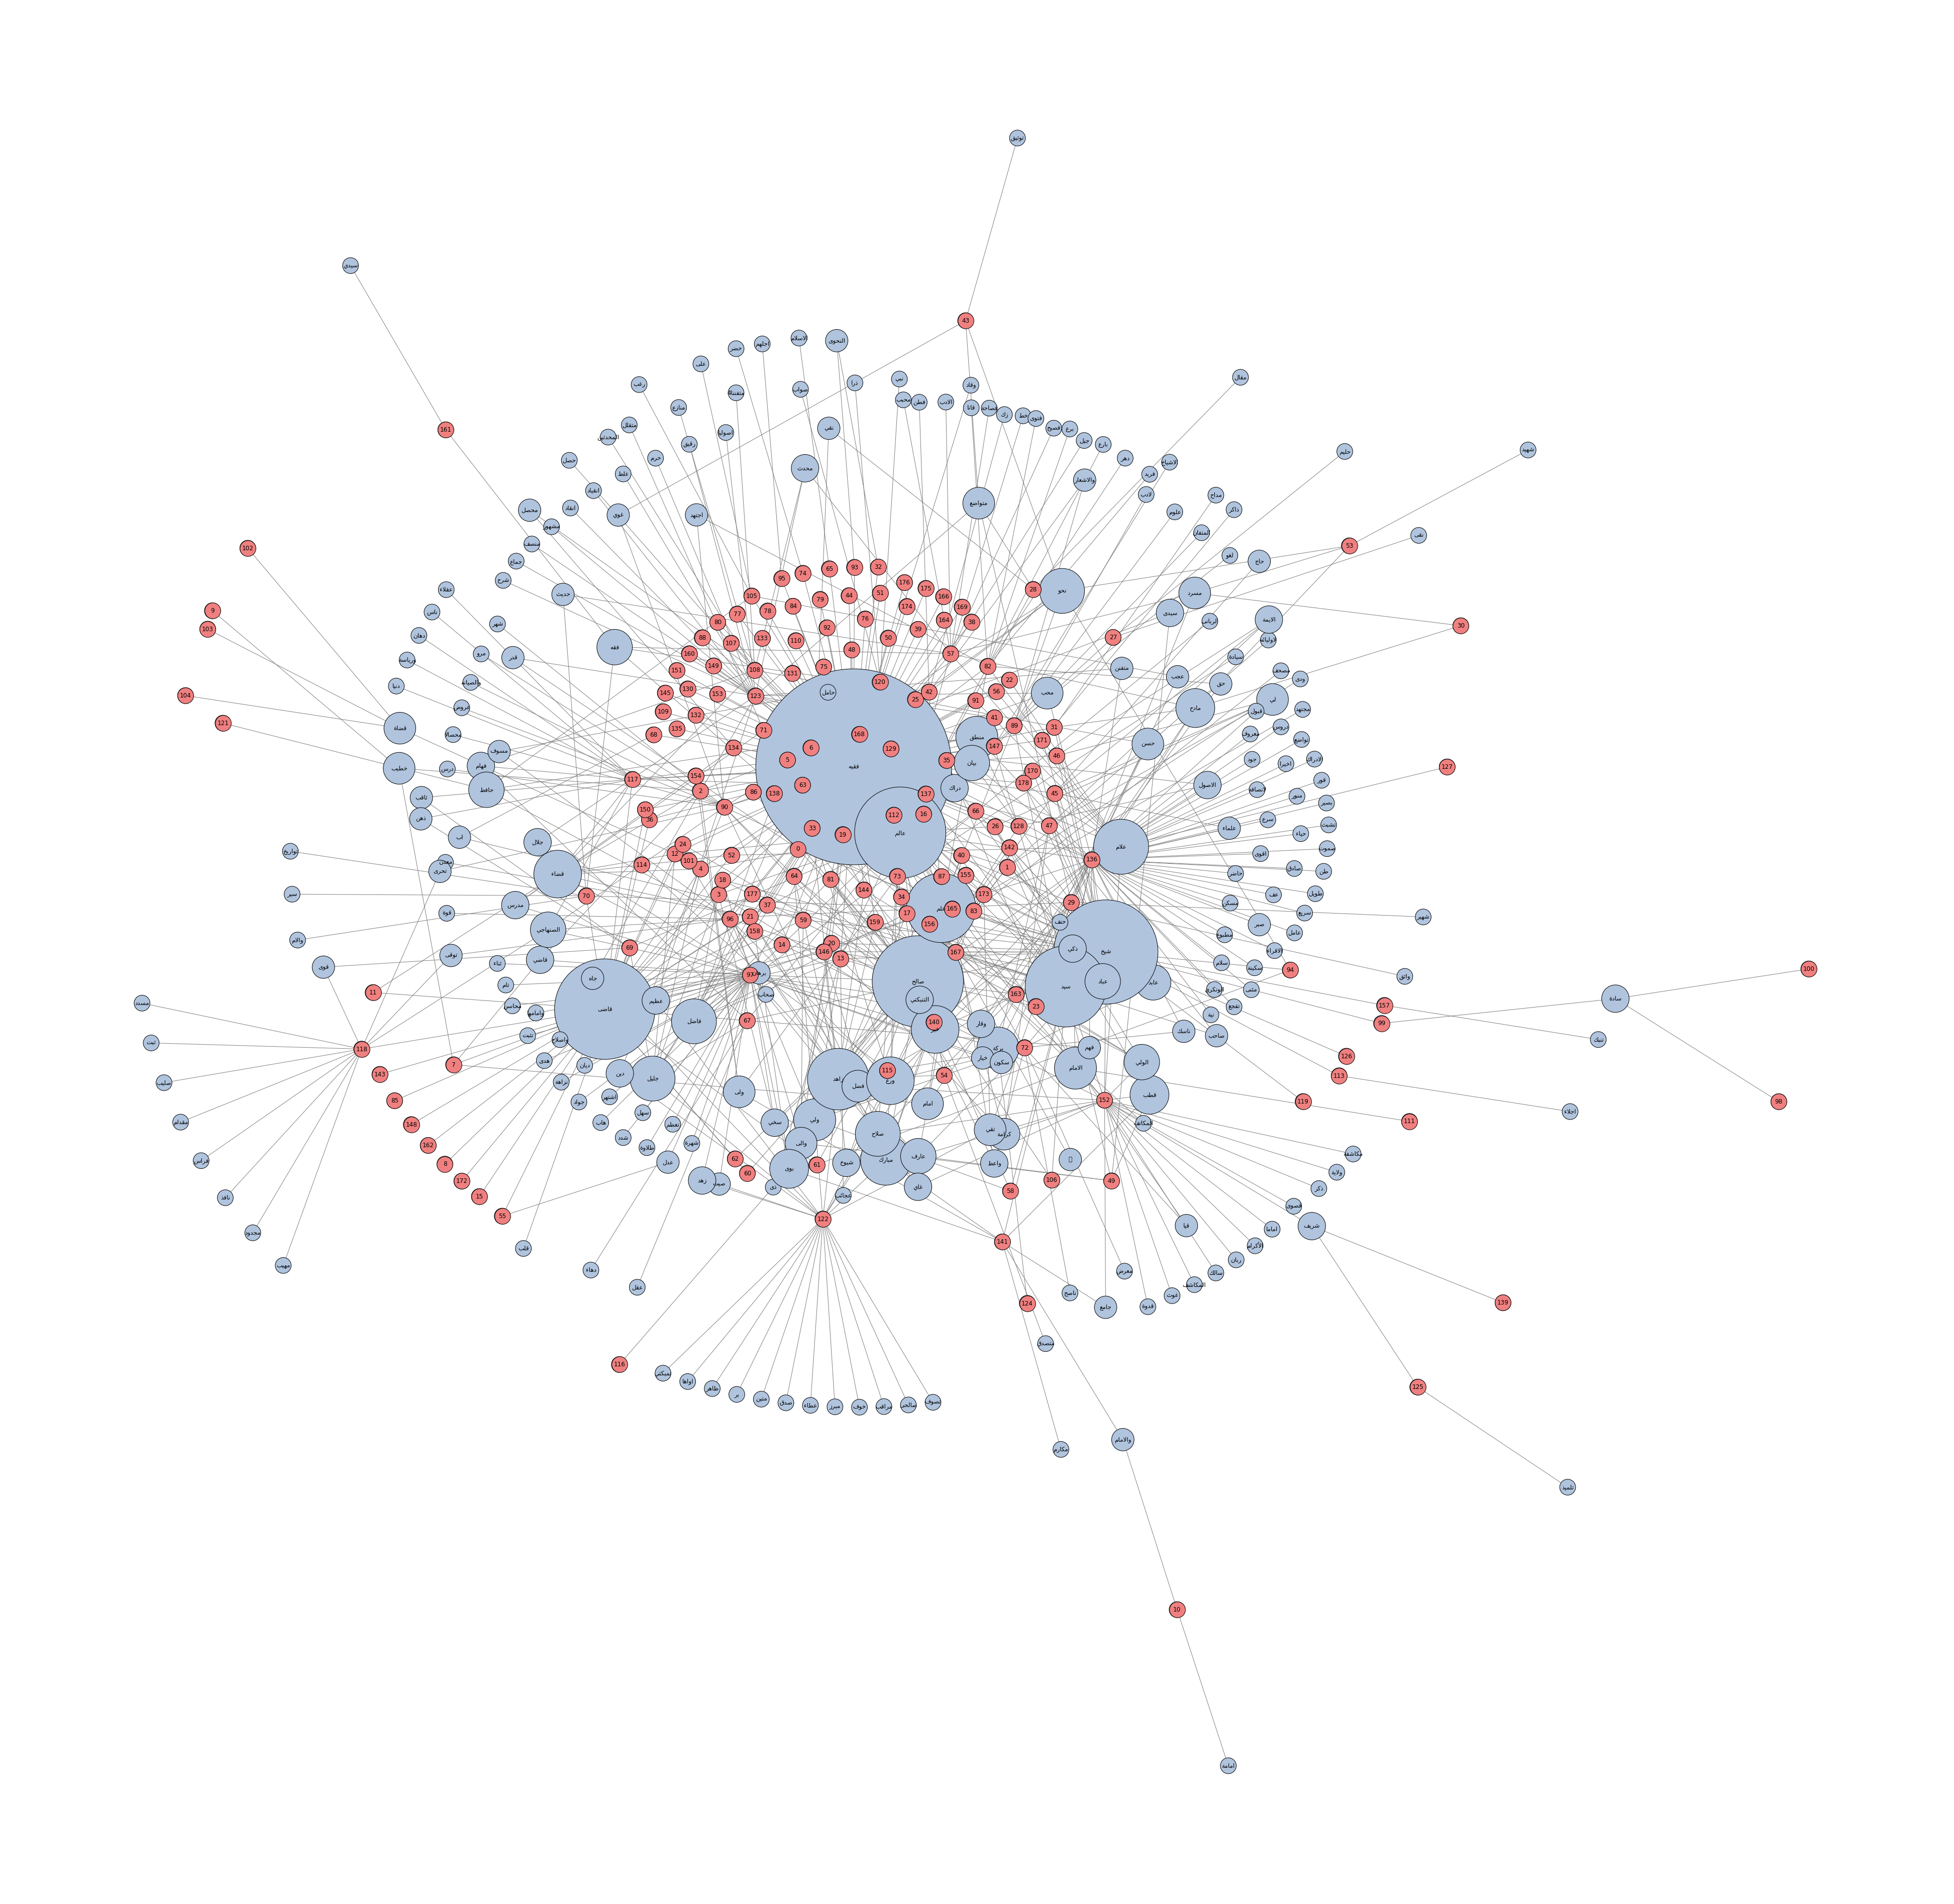

In [127]:
d = nx.degree(title_graph)
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
pos = nx.kamada_kawai_layout(title_graph)
plt.figure(figsize=(5000*px, 5000*px)) 

# nodes
nx.draw_networkx_nodes(title_graph, pos, node_size= sizes, node_color="lightsteelblue",edgecolors='black')
nx.draw_networkx_nodes(title_graph, pos, nodelist=scholars, node_size= 1000, node_color="lightcoral",edgecolors='black')

# edges
nx.draw_networkx_edges(title_graph, pos, width=1, edge_color="gray")

# node labels
nx.draw_networkx_labels(title_graph, pos, font_size=12, font_family="sans-serif", font_color='black')

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")

plt.show()

In [107]:
#plot 2-core graph
title_graph_reduced=title_graph.copy()
remove = [node for node,degree in dict(title_graph.degree()).items() if degree < 2]
title_graph_reduced.remove_nodes_from(remove)

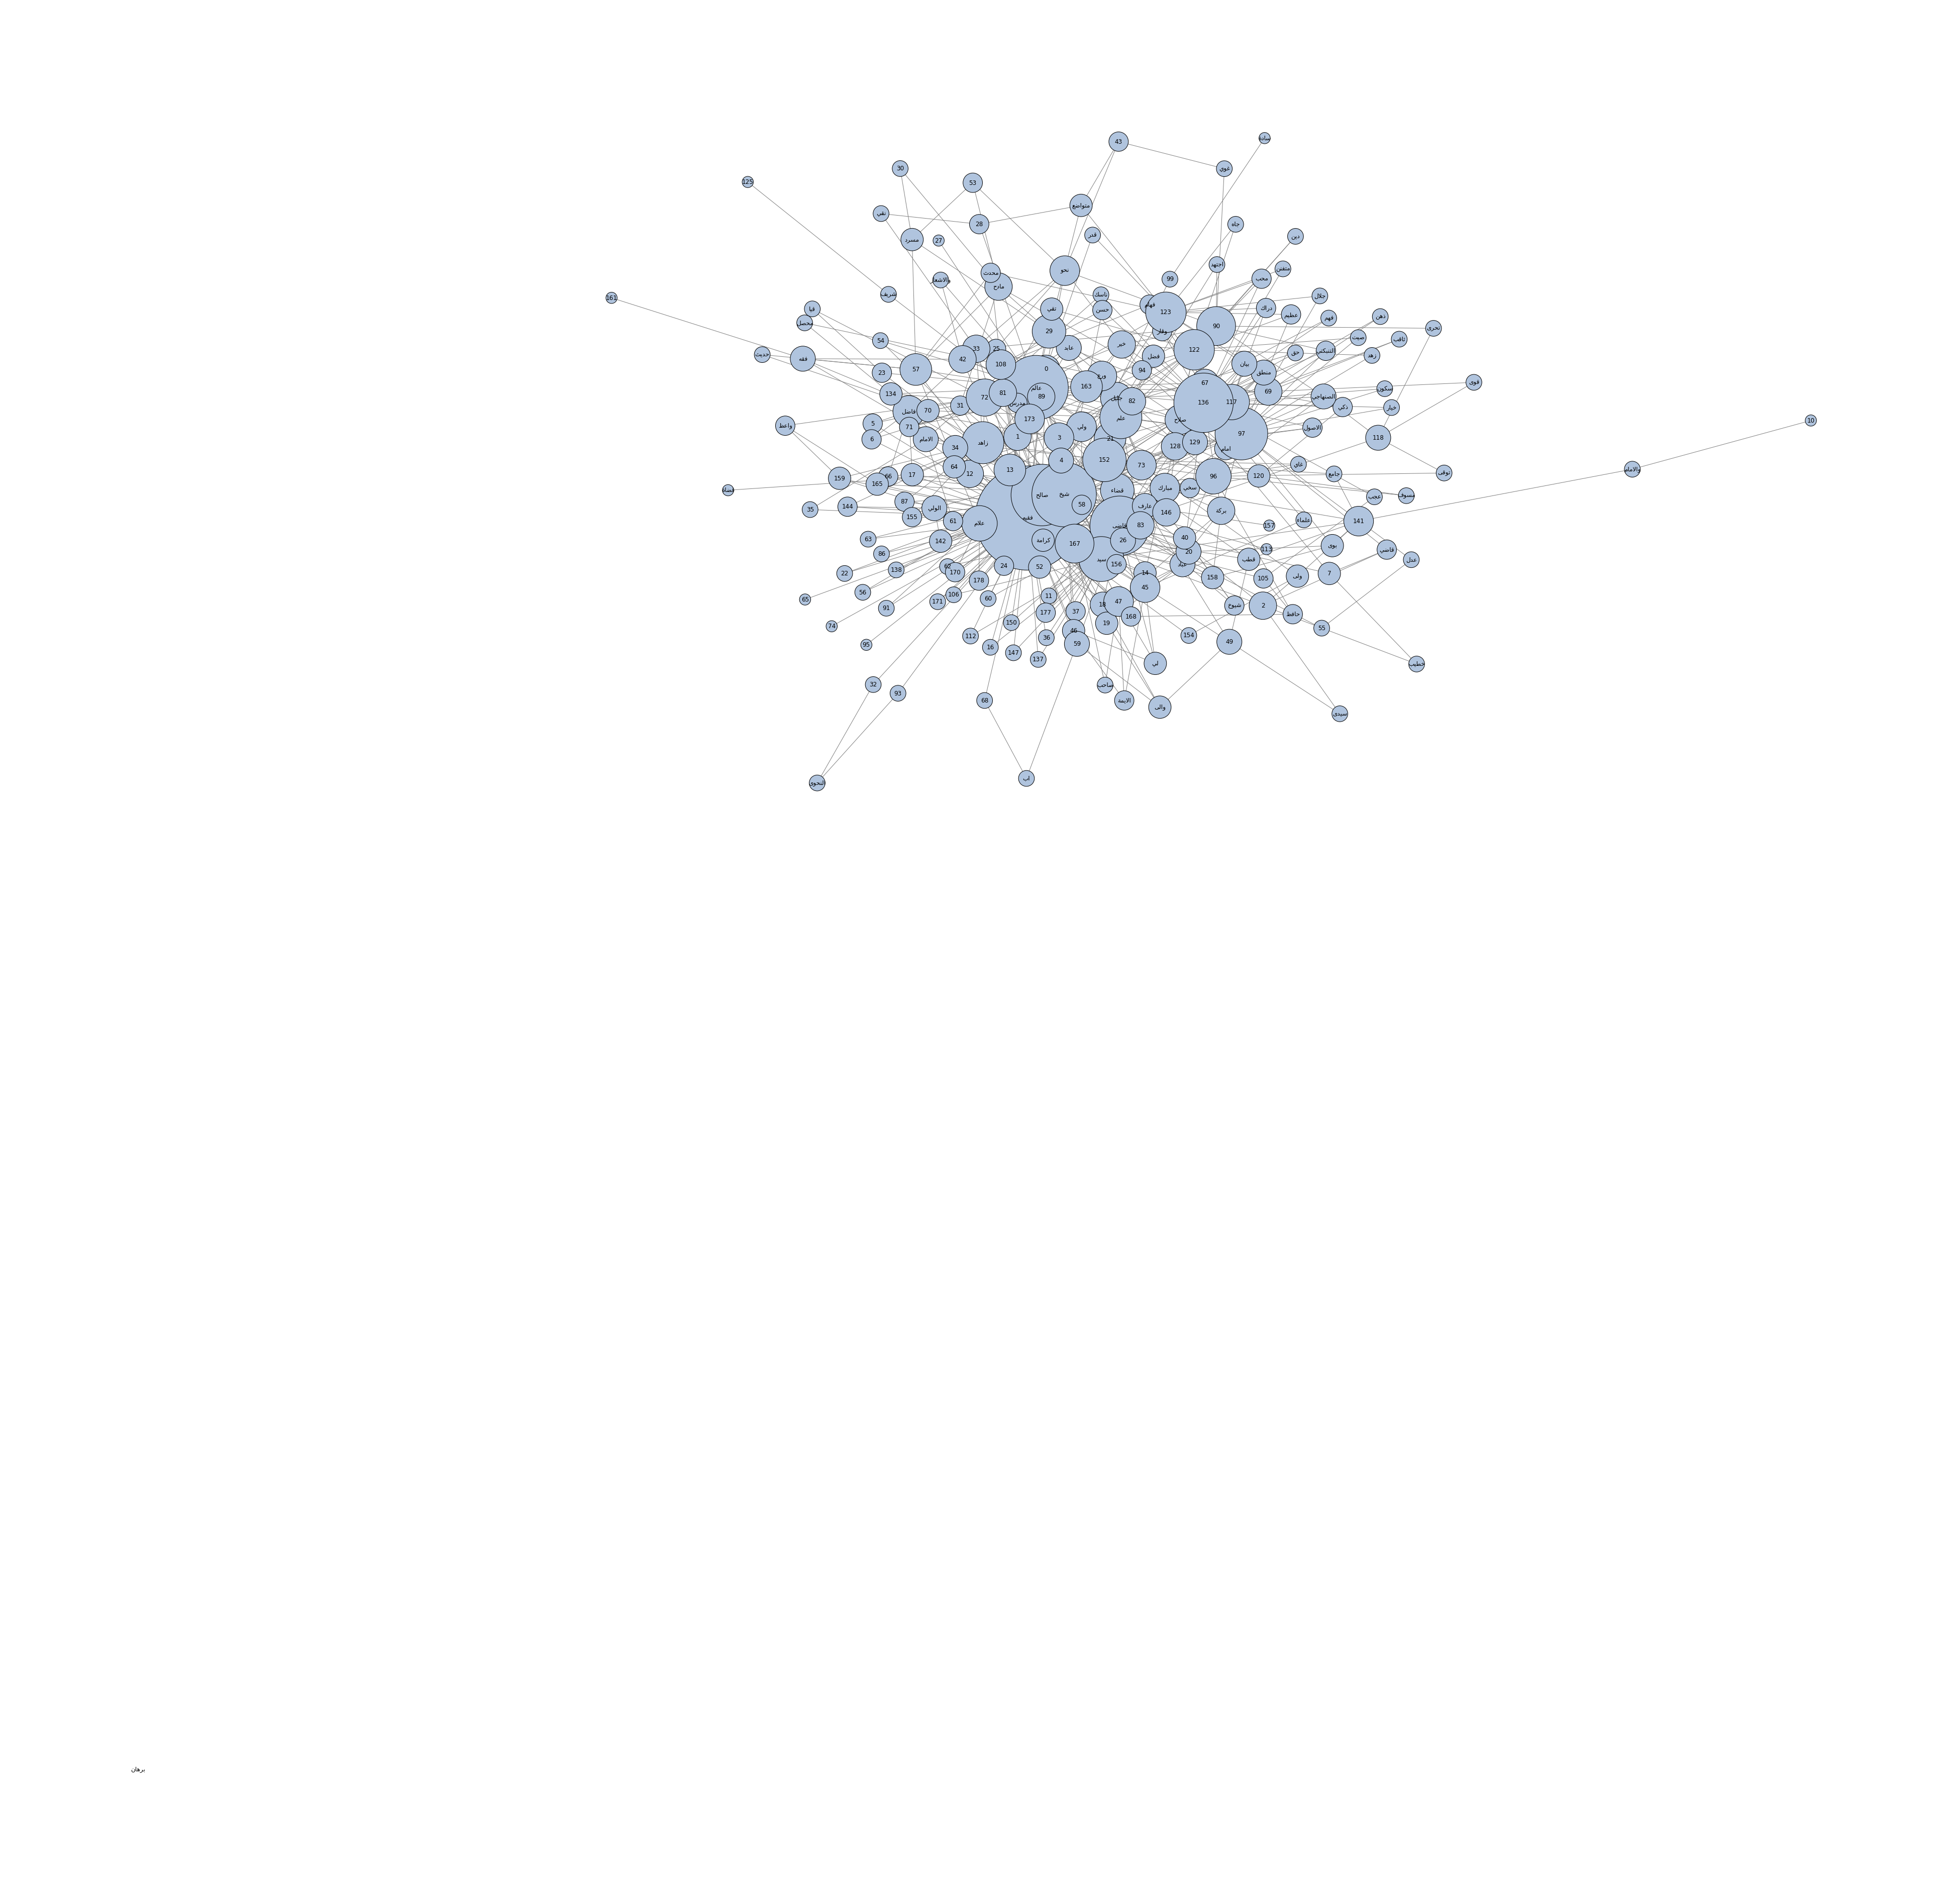

In [120]:
node_sizes=nx.get_node_attributes(title_graph_reduced,'uses')
sizes=list()
for node in node_sizes:
    sizes.append(1000*node_sizes.get(node))

scholars = [x for x,y in title_graph_reduced.nodes(data=True) if y['typ']=='scholar']
descripts = [x for x,y in title_graph_reduced.nodes(data=True) if y['typ']=='title']

d = dict(title_graph_reduced.degree)
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
pos = nx.kamada_kawai_layout(title_graph_reduced)
plt.figure(figsize=(5000*px, 5000*px)) 

# nodes
nx.draw_networkx_nodes(title_graph_reduced, pos, node_size=[v * 500 for v in d.values()], node_color="lightsteelblue",edgecolors='black')
#nx.draw_networkx_nodes(title_graph_reduced, pos, nodelist=scholars, node_size=[v * 200 for v in d.values()], node_color="lightcoral",edgecolors='black')

# edges
nx.draw_networkx_edges(title_graph_reduced, pos, width=1, edge_color="gray")

# node labels
nx.draw_networkx_labels(title_graph_reduced, pos, font_size=12, font_family="sans-serif", font_color='black')

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")

plt.show()

In [188]:
title_graph.number_of_nodes()

451

In [175]:
#Analyzing Qadi descriptions

#contract قاصي and قضاء
qadi_graph=nx.contracted_nodes(title_graph,'ﻲﺿﺎﻗ','ﺓﺎﻀﻗ')
qadi_graph=nx.contracted_nodes(qadi_graph,'ﻲﺿﺎﻗ','ﺀﺎﻀﻗ')
qadi_graph=nx.contracted_nodes(qadi_graph,'ﻲﺿﺎﻗ','ﻰﺿﺎﻗ')

In [189]:
qadi_graph.degree('ﻞﻴﻠﺟ')

8

In [177]:
sorted(qadi_graph.degree, key=lambda x: x[1], reverse=True)

[('ﻪﻴﻘﻓ', 120),
 (136, 61),
 ('ﻲﺿﺎﻗ', 41),
 (97, 38),
 ('ﺦﻴﺷ', 35),
 ('ﻢﻟﺎﻋ', 33),
 ('ﺢﻟﺎﺻ', 30),
 (152, 26),
 (122, 25),
 (123, 23),
 (90, 18),
 ('ﺪﻴﺳ', 16),
 ('ﺪﻫﺍﺯ', 14),
 ('ﻢﻠﻋ', 14),
 (57, 14),
 (117, 14),
 (167, 14),
 (72, 13),
 (118, 13),
 (82, 12),
 ('ﻡﻼﻋ', 11),
 (29, 11),
 (96, 11),
 (108, 11),
 (13, 10),
 (89, 10),
 (73, 9),
 ('ﻞﻴﻠﺟ', 8),
 (1, 8),
 ('ﻞﺿﺎﻓ', 8),
 (21, 8),
 (42, 8),
 (45, 8),
 (67, 8),
 (120, 8),
 (141, 8),
 (163, 8),
 (173, 8),
 ('ﻲﻟﻭ', 7),
 (3, 7),
 ('ﻙﺭﺎﺒﻣ', 7),
 ('ﺔﻛﺮﺑ', 7),
 ('ﺡﻼﺻ', 7),
 ('ﻮﺤﻧ', 7),
 ('ﻉﺭﻭ', 7),
 (47, 7),
 (69, 7),
 (70, 7),
 (83, 7),
 (0, 6),
 ('ﺮﻴﺧ', 6),
 ('ﺡﺩﺎﻣ', 6),
 ('ﻡﺎﻣﻻﺍ', 6),
 (33, 6),
 (81, 6),
 (128, 6),
 (146, 6),
 ('ﺪﺑﺎﻋ', 5),
 (2, 5),
 (18, 5),
 ('ﺩﺎﺒﻋ', 5),
 (20, 5),
 ('ﻯﻮﺑ', 5),
 (26, 5),
 (34, 5),
 ('ﻪﻘﻓ', 5),
 (49, 5),
 ('ﻑﺭﺎﻋ', 5),
 (59, 5),
 ('ﻲﺟﺎﻬﻨﺼﻟﺍ', 5),
 (105, 5),
 ('ﻖﻄﻨﻣ', 5),
 ('ﻥﺎﻴﺑ', 5),
 (129, 5),
 ('ﻲﻟﻮﻟﺍ', 5),
 ('ﻰﻟﻭ', 4),
 (4, 4),
 ('ﻡﺎﻣﺍ', 4),
 (12, 4),
 ('ﺔﻣﺍﺮﻛ', 4),
 (14, 4),
 (17, 4),
 ('ﻰﻟﺍﻭ', 4),
 (19

In [193]:
qadi_assoc=dict()
for node in qadi_graph.nodes():
    c_neighbors=list(nx.common_neighbors(qadi_graph,'ﻲﺿﺎﻗ',node))
    if len(c_neighbors) >= 2:
        qadi_assoc[node] = c_neighbors

In [194]:
for term in qadi_assoc:
    print(term, len(qadi_assoc[term]))

ﻪﻴﻘﻓ 21
ﻢﻟﺎﻋ 9
ﺢﻟﺎﺻ 7
ﻞﻴﻠﺟ 6
ﺦﻴﺷ 4
ﻲﺿﺎﻗ 41
ﺐﻴﻄﺧ 2
ﻞﺿﺎﻓ 2
ﻲﺨﺳ 2
ﺪﻴﺳ 3
ﻰﻟﺍﻭ 2
ﻯﻮﺑ 3
ﺔﻛﺮﺑ 3
ﻢﻠﻋ 4
ﺡﻼﺻ 3
ﻝﺪﻋ 2
ﻡﺎﻬﻓ 3
ﺐﻗﺎﺛ 2
ﻦﻫﺫ 2
ﻯﻮﻗ 2
ﻲﺟﺎﻬﻨﺼﻟﺍ 3


In [198]:
nx.write_edgelist(title_graph, "TS_Scholars_Edgelist", data=True,)